In [3]:
from google.colab import files
uploaded = files.upload()

Saving 06-RollingRegCarSales.csv to 06-RollingRegCarSales (2).csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
from statsmodels.tsa.arima.model import ARIMA
import warnings

warnings.filterwarnings("ignore", message="Non-stationary starting autoregressive parameters found")
warnings.filterwarnings("ignore", message="Non-invertible starting MA parameters found")
warnings.filterwarnings("ignore", category=FutureWarning)


plt.rcParams["figure.figsize"] = (8, 4)
plt.style.use("seaborn-v0_8-whitegrid")

RANDOM_STATE = 42



In [5]:
data = pd.read_csv('06-RollingRegCarSales.csv')
data.head()


,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


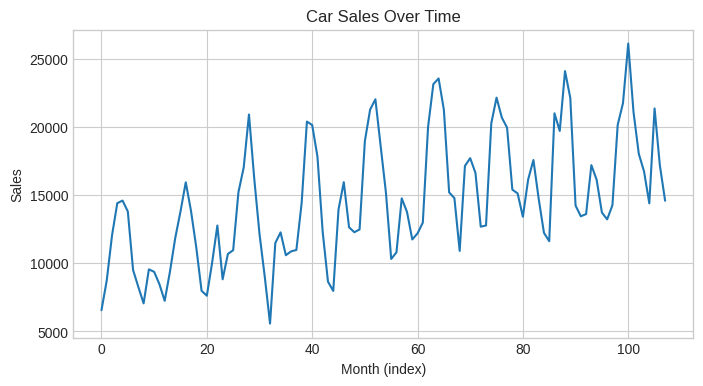

In [6]:
plt.figure(figsize=(8,4))
plt.plot(data['Sales'])
plt.title('Car Sales Over Time')
plt.xlabel('Month (index)')
plt.ylabel('Sales')
plt.show()

In [7]:
window = 12
predictions = []
actuals = []

for i in range(window, len(data)):
    train_y = data['Sales'].iloc[i-window:i].values
    X = np.arange(window).reshape(-1, 1)
    model = LinearRegression()
    model.fit(X, train_y)


    pred = model.predict(np.array([[window]]))[0]
    predictions.append(pred)
    actuals.append(data['Sales'].iloc[i])

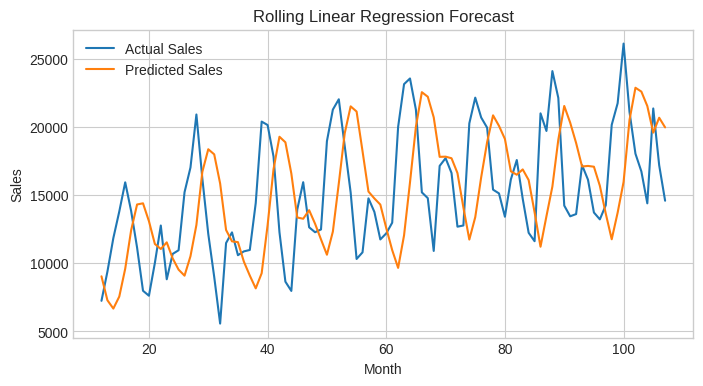

In [8]:
plt.figure(figsize=(8,4))
plt.plot(range(window, len(data)), actuals, label='Actual Sales')
plt.plot(range(window, len(data)), predictions, label='Predicted Sales')
plt.title('Rolling Linear Regression Forecast')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [9]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
import math

train_size = int(len(data) * 0.8)
train, test = data['Sales'][:train_size], data['Sales'][train_size:]

predictions = []
history = list(train)

for t in range(len(test)):
    model = ARIMA(history, order=(1,1,1))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    history.append(test.iloc[t])


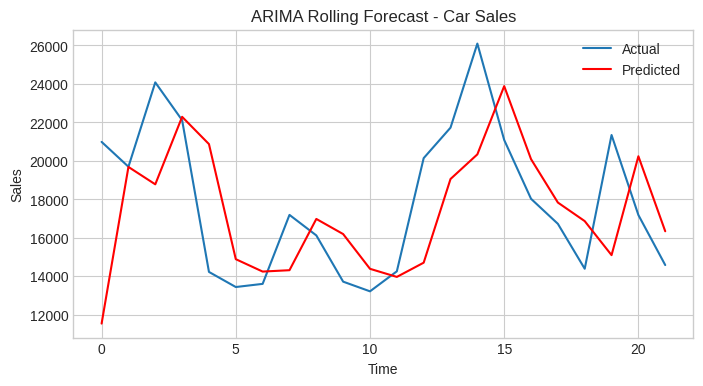

In [10]:
plt.figure(figsize=(8,4))
plt.plot(test.values, label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.title('ARIMA Rolling Forecast - Car Sales')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()


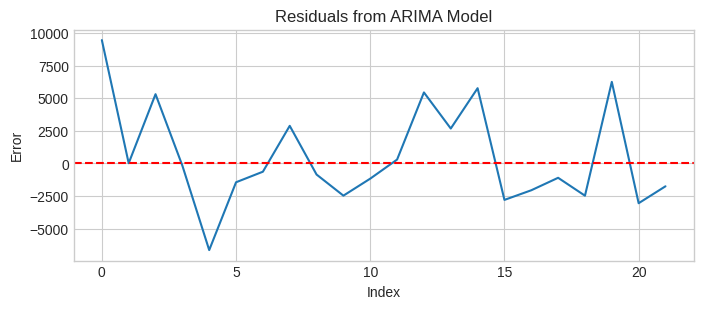

In [11]:
residuals = [test.values[i] - predictions[i] for i in range(len(predictions))]
plt.figure(figsize=(8,3))
plt.plot(residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals from ARIMA Model')
plt.xlabel('Index')
plt.ylabel('Error')
plt.show()
